<a href="https://colab.research.google.com/github/rosariorogel/DataSciencieRRS/blob/main/Ejercicio_Numpy_ROGEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estadística básica con Numpay

En esta sesión cubriremos los siguientes conceptos de estadística:

1. Media
2. Mediana
3. Percentiles
4. Rango intercuartil
5. Valores atípicos
6. Desviación estándar

In [ ]:
#Para instalar Numpay usar el siguiente código. NO es necesario en Google Colab
!pip install numpy

In [ ]:
#Aquí estamos importando las bibliotecas que se van a utilizar en este ejercicio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Cargando el dataset
Utilizaremos el dataset de la información del Titanic

In [ ]:
#Aquí estoy trayendo un dataset, se usa el signo ! para "ejecutar un comando", --no- para que no se haga algo, -O (es una o mayúscula) y es para decirle "out put" y el nombre de como quiero que se llame el dataset
!wget --no-check-certificate https://catalabs.mx/datasets/titanic.csv -O titanic.csv

--2023-12-16 17:41:35--  https://catalabs.mx/datasets/titanic.csv
Resolving catalabs.mx (catalabs.mx)... 174.136.30.149
Connecting to catalabs.mx (catalabs.mx)|174.136.30.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.05s   

2023-12-16 17:41:35 (1.17 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
#Aquí estoy definiendo el nombre del dataset, que aquí es df_titanic
df_titanic = pd.read_csv("titanic.csv")

In [ ]:
#Aquí con "head" y paréntesis vacíos le digo que me despliegue los primeros cinco registros del dataset
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#Aquí con "tail" y paréntesis vacíos le digo que me despliegue los últimos cinco registros del dataset
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#Con "describe" le digo que me genere las estadísticas descriptivas básicas generalespara todas las variables del dataset y las gráficas correspondientes
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#En este caso con "describe" se generan estadísticas básicas generales para una sola variable, en este caso "Age"
df_titanic.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
#En este caso con "describe" se generan estadísticas básicas generales para una sola variable, en este caso "Sex"
df_titanic.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [ ]:
#Aquí se genera un cálculo conosiderando la edad promedio más 3, entre 14.2 que es la desviación estándar
print(29.7+3*14.2)

72.3


Text(0.5, 0, 'Id de Pasajero')

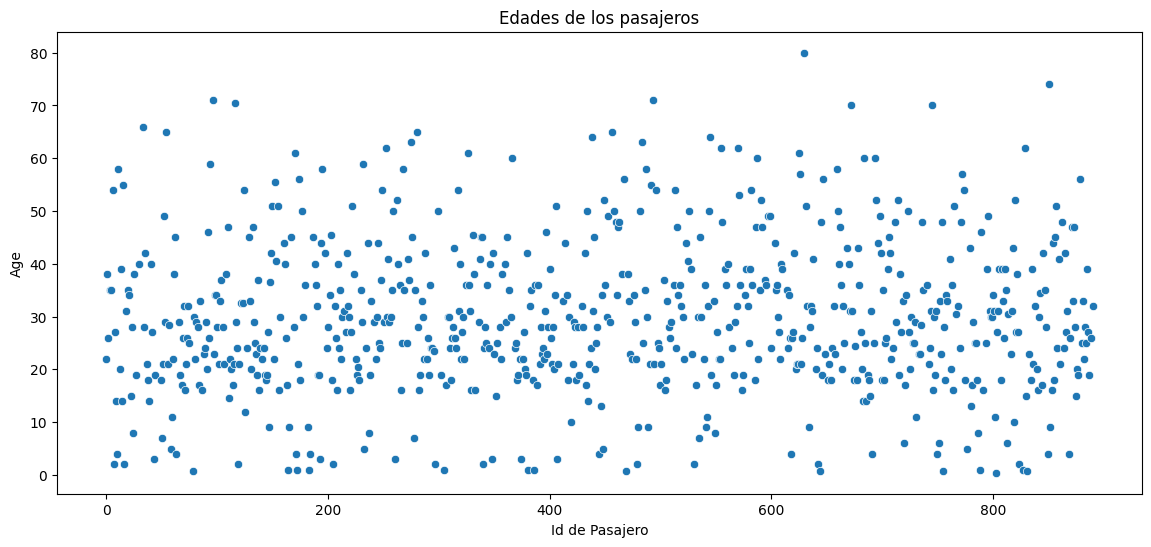

In [ ]:
# Fija el ancho y alto de la figura en pulgadas con seprador de comas
plt.figure(figsize=(14,6))
# Agrega título
plt.title("Edades de los pasajeros")
sns.scatterplot(data=df_titanic.Age)
#Agregar un comentario abajo de la gráfica
plt.xlabel("Id de Pasajero")

<Axes: xlabel='Age', ylabel='Count'>

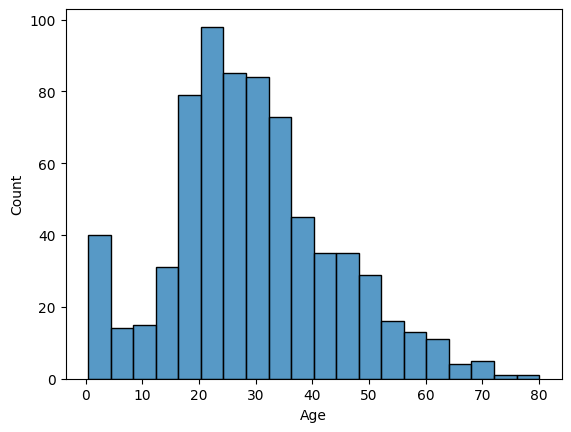

In [ ]:
#Con seaborn graficar un histograma de las edades
sns.histplot(x=df_titanic.Age)

<Axes: xlabel='Pclass', ylabel='Age'>

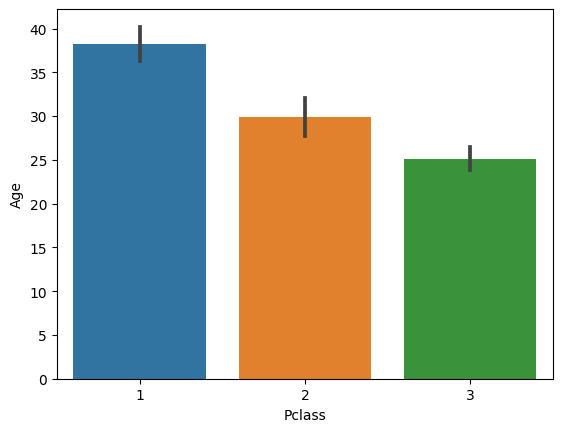

In [ ]:
#Con seaborn graficar barras poner ex x la clase del pasajero y en y la edad
sns.barplot(x=df_titanic.Pclass, y=df_titanic.Age)

In [ ]:
#Le voy a pedir que me muestre cuáles son los datos de las edades, notas que NaN son datos nulos,
edades = df_titanic.Age
edades.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [ ]:
#Revisar la estructura del dataset, revisar cuántos rengloes y cuántas columnas
df_titanic.shape

(891, 12)

In [ ]:
#Aquí me indica solamente el número de renglones
edades.shape

(891,)

###Eliminamos los valores nulos

In [ ]:
#Xon "dropna" estoy quitando los datos nulos de la base de datos, en este caso solo para la variable edades
edades = edades.dropna()

In [ ]:
edades.head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
18    31.0
20    35.0
21    34.0
22    15.0
Name: Age, dtype: float64

In [ ]:
#Para trasladar los datos, en este caso de la variable "Age" a numpay se agragn paréntesis vacíos y se pone aparte la variable
pasajeros_edades = edades.to_numpy()
pasajeros_edades
print(pasajeros_edades)

[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   38.   45.
  4.   29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83
 30.   22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.
 26.   59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.
 38.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 32.5  32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.
 19.   37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5
 42.   51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.
  1.    9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.
 36.    9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.
 58.   42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.
 24

In [ ]:
edad_promedio = np.mean(pasajeros_edades)
desviacion_std = np.std(pasajeros_edades)
print(f"Edad promedio de los pasajeros: {edad_promedio}")
print(f"Desviación estándar: {desviacion_std}")

Edad promedio de los pasajeros: 29.69911764705882
Desviación estándar: 14.516321150817316


### Calcular el porcentaje de personas menores o con 21 años

In [ ]:
porc_menores_a_21 = np.mean(pasajeros_edades < 21)
print(f"Porcentaje de pasajeros menores de 21 años {porc_menores_a_21*100}%")

Porcentaje de pasajeros menores de 21 años 25.210084033613445%


### Calcular porcentaje de personas de 20 a 40 años, inclusive

En este caso se deben cumplir dos condiciones, mayor a 20 y menor a 40

In [ ]:
porc_menores_20 = np.mean(pasajeros_edades < 20)
porc_menores_41 = np.mean(pasajeros_edades < 41)
porc_20y40 = np.mean(porc_menores_41 - porc_menores_20)
print(porc_menores_a_21)
print(porc_menores_41)
print(porc_20y40*100)

0.25210084033613445
0.7927170868347339
56.30252100840336


In [ ]:
#Este es el código de Pau López
porc_entre_20y40_incl = np.mean([pasajeros_edades >= 20] and [pasajeros_edades <= 40])
print(porc_entre_20y40_incl)

0.7899159663865546


In [ ]:
#Código de Rafael Platon, bitwise convierte edades a binario y lo evlúa contra la condición solicitada con un AND

np.mean(np.bitwise_and(pasajeros_edades>=20,pasajeros_edades<41))

0.5630252100840336

### ¿En qué clase de viajeros sobrevivieron más pasajeros?

Cuántas personas sobrevivieron de cada clase, primera, segunda y tercera clase.

In [ ]:
#Descripción de la clase en la que viajaban los turistas
df_titanic.Pclass

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

### Cálculo de media de matrices 2D

In [ ]:
edades_sobrevivientes = df_titanic[["Age","Survived"]]
edades_sobrevivientes = edades_sobrevivientes.dropna()

In [ ]:
edades_sobrevivientes.shape

(714, 2)

In [ ]:
edades_sobrevivientes.head()

,Age,Survived
0,22.0,0
1,38.0,1
2,26.0,1
3,35.0,1
4,35.0,0


Convertir los datos a un arreglo de Numpy

In [ ]:
edades_sobrevivientes_arreglo = edades_sobrevivientes.to_numpy()
print(edades_sobrevivientes_arreglo[:30])

[[22.  0.]
 [38.  1.]
 [26.  1.]
 [35.  1.]
 [35.  0.]
 [54.  0.]
 [ 2.  0.]
 [27.  1.]
 [14.  1.]
 [ 4.  1.]
 [58.  1.]
 [20.  0.]
 [39.  0.]
 [14.  0.]
 [55.  1.]
 [ 2.  0.]
 [31.  0.]
 [35.  0.]
 [34.  1.]
 [15.  1.]
 [28.  1.]
 [ 8.  0.]
 [38.  1.]
 [19.  0.]
 [40.  0.]
 [66.  0.]
 [28.  0.]
 [42.  0.]
 [21.  0.]
 [18.  0.]]


In [ ]:
edades_sobrevivientes_arreglo = edades_sobrevivientes_arreglo.transpose()
print(edades_sobrevivientes_arreglo)

[[22. 38. 26. ... 19. 26. 32.]
 [ 0.  1.  1. ...  1.  1.  0.]]


In [ ]:
np.mean(edades_sobrevivientes_arreglo, axis=1)

array([29.69911765,  0.40616246])

In [ ]:
print(pasajeros_edades)
pasajeros_edades_ordenados = np.sort(pasajeros_edades)
print(pasajeros_edades_ordenados)

[22.   38.   26.   35.   35.   54.    2.   27.   14.    4.   58.   20.
 39.   14.   55.    2.   31.   35.   34.   15.   28.    8.   38.   19.
 40.   66.   28.   42.   21.   18.   14.   40.   27.    3.   19.   18.
  7.   21.   49.   29.   65.   21.   28.5   5.   11.   22.   38.   45.
  4.   29.   19.   17.   26.   32.   16.   21.   26.   32.   25.    0.83
 30.   22.   29.   28.   17.   33.   16.   23.   24.   29.   20.   46.
 26.   59.   71.   23.   34.   34.   28.   21.   33.   37.   28.   21.
 38.   47.   14.5  22.   20.   17.   21.   70.5  29.   24.    2.   21.
 32.5  32.5  54.   12.   24.   45.   33.   20.   47.   29.   25.   23.
 19.   37.   16.   24.   22.   24.   19.   18.   19.   27.    9.   36.5
 42.   51.   22.   55.5  40.5  51.   16.   30.   44.   40.   26.   17.
  1.    9.   45.   28.   61.    4.    1.   21.   56.   18.   50.   30.
 36.    9.    1.    4.   45.   40.   36.   32.   19.   19.    3.   44.
 58.   42.   24.   28.   34.   45.5  18.    2.   32.   26.   16.   40.
 24

<Axes: >

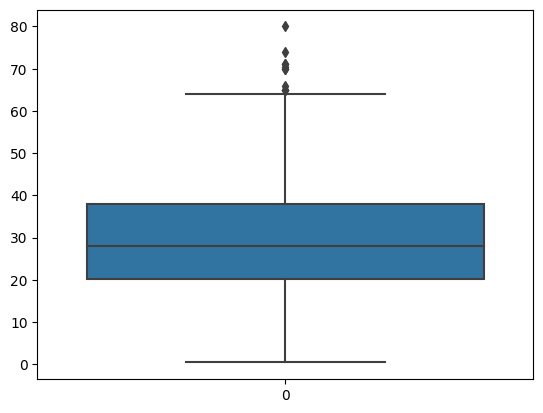

In [ ]:
sns.boxplot(data=df_titanic.Age)

In [ ]:
media = np.mean(pasajeros_edades)
mediana = np.median(pasajeros_edades)
print(f"La media de las edades es: {media}")
print(f"La mediana de las edades es: {mediana}")

La media de las edades es: 29.69911764705882
La mediana de las edades es: 28.0


In [ ]:
lista_calificaciones = [96, 97, 98, 99, 100, 90, 140]
calificaciones = np.array(lista_calificaciones)

In [ ]:
print(np.mean(calificaciones))

102.85714285714286


In [ ]:
print(np.median(calificaciones))

98.0


In [ ]:
print(f"El percentil 90 de las edades es {np.percentile(pasajeros_edades, 90)}")
print(f"El percentil 5 de las edades es {np.percentile(pasajeros_edades, 5)}")

El percentil 90 de las edades es 50.0
El percentil 5 de las edades es 4.0


In [ ]:
primer_cuartil = np.percentile(pasajeros_edades,25)
tercer_cuartil = np.percentile(pasajeros_edades,75)
rango_intercuartil = tercer_cuartil - primer_cuartil
print(f"primer_cuartil: {primer_cuartil}")
print(f"tercer_cuartil: {tercer_cuartil}")
print(f"rango_intercuartil: {rango_intercuartilcuartil}")

print(f"El percentil 90 de las edades es {np.percentile(pasajeros_edades, 90)}")
print(f"El percentil 5 de las edades es {np.percentile(pasajeros_edades, 5)}")

primer_cuartil: 20.125
tercer_cuartil: 38.0


NameError: ignored